# Community Detection Problem

The community detection problem is the general form of a network problem that can be used to detect fraud rings in transaction networks. The problem is as follows: given a graph $G=(V,E)$, where each node represents a person or institution and each edge represents a transaction (which can be weighted by the amount in more sophisticated problems), divide the nodes into $k$ communities such that modularity is maximized. 

In plain English, maximizing modularity will maximize the connectedness within groups of nodes and minimize connectedness between groups of nodes. Mathematically, modularity is: $$M=\frac{1}{2m}\sum_{i,j,k}(A_{i,j}-\frac{g_{i}{g_{j}}}{2m})c_{ik}c_{jk}$$

where $m$ is the total weight of the graph (i.e. the number of edges in an unweighted graph), $A$ is the adjacency matrix of the graph, $g_{i}$ is the degree of node $i$, and $c_{ik}$ is the binary decision variable of whether node $i$ is in community $k$. This problem is NP-hard.

Essentially, what we are seeking to maximize is the difference between the actual number of edges in a community and the expected number of edges.

There are some existing classical algorithms for community detection. The Girvan-Newman algorithm is an earlier algorithm but suffers from poor results and a slow run time of $O(m^{2}n)$. The Louvain algorithm shows generally better results and a runtime of $O(n log(n))$ but can produce some poor results in larger networks due to [resolution limit](https://en.wikipedia.org/wiki/Modularity_(networks)#Resolution_limit).

Here, we'll demonstrate the community detection algorithm on a graph of the 2000 season for college football, where nodes are teams and edges are games played between teams that season. Let's see if we can detect conferences.

In [1]:
from quantum_community_detection_football import *  # Helper functions (not publically available)

Here's the graph without any coloring.


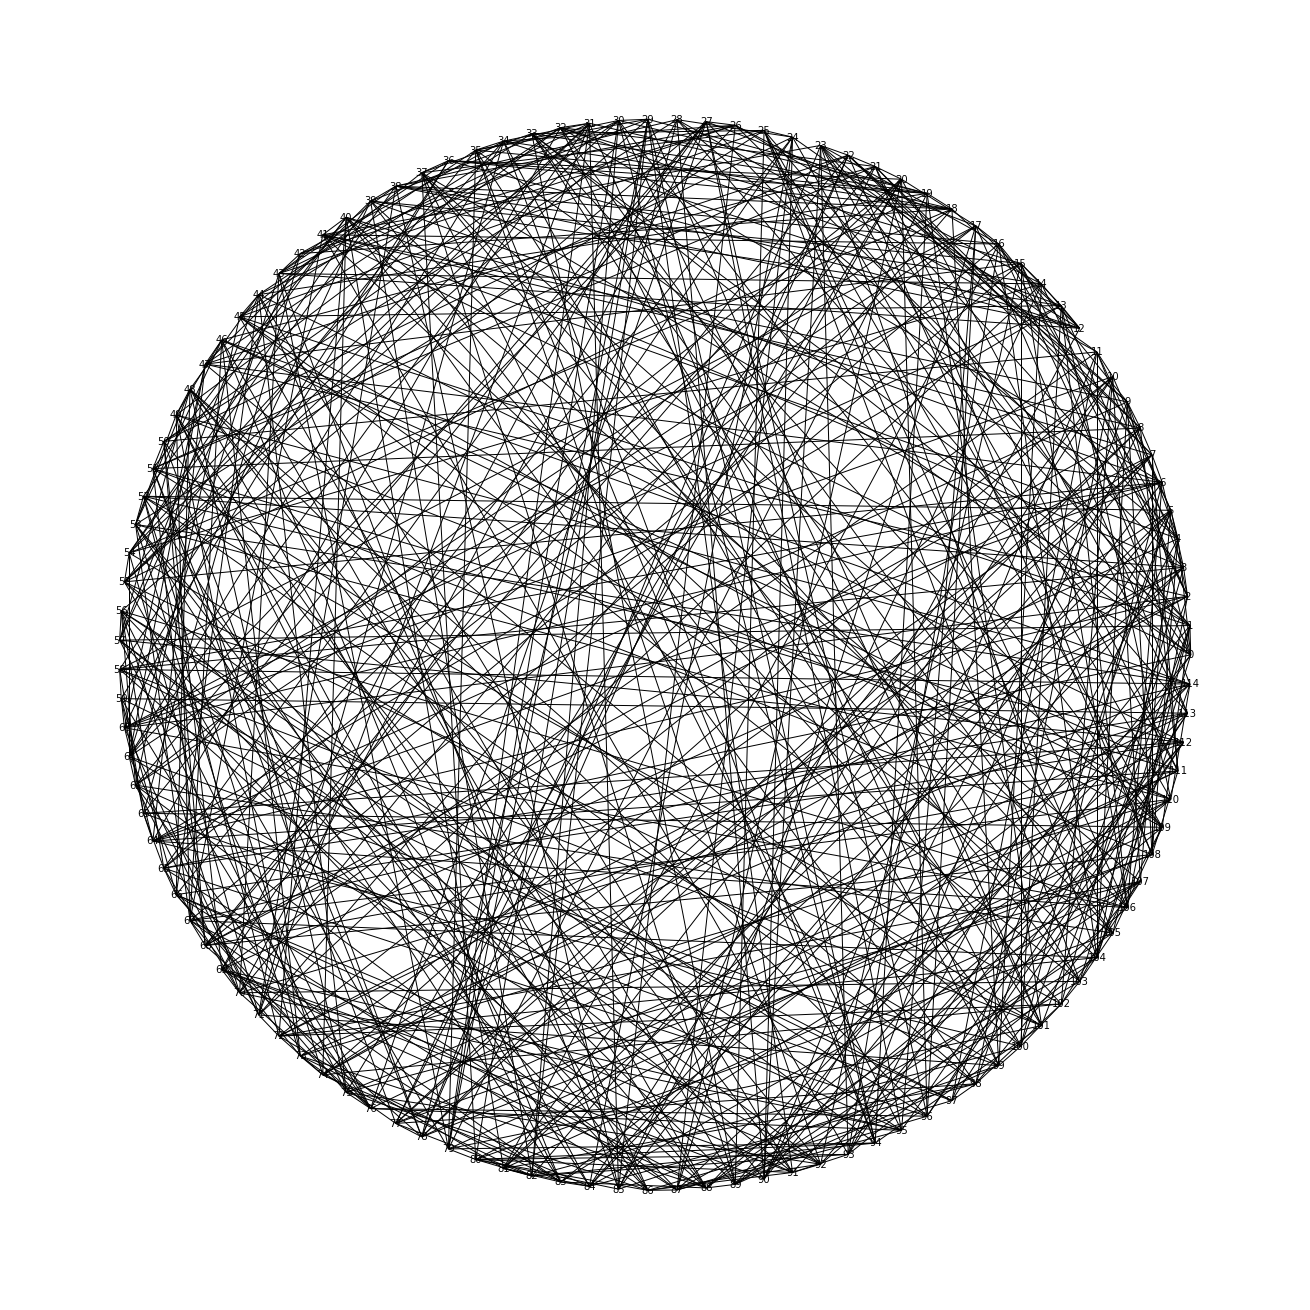

In [2]:
best_M = float("-inf")  # If doing multiple iterations, track best modularity across iterations
best_sol = None  # Track best solution across iterations
best_communities = []  # Track best communities across solutions
lam = sympy.Symbol("lam")  # Placeholder for penalty term
k = 12  # number of communities (conferences) to break into


G, A, m, gs, node_mapping = create_football_graph()
c, x = create_binary_variables(G, A, m, k)
obj = create_obj_function(G, A, x, c, lam, k, m)  # Modularity expression to be maximized
print("Here's the graph without any coloring.")
color_map(best_communities, G)

In [3]:
for p in tqdm(range(1)):  # Change range if want to solve multiple times
    lambda_penalty = 0.005  # Penalty factor
    sol_dict, communities = solve_community_detections(obj, lambda_penalty, k)
    if not check_validity(sol_dict, G):
        continue  # Discard if penalty term not enforced
    M = calc_modularity(G, A, sol_dict, m)
    if M > best_M:
        best_M = M

        best_sol = sol_dict
        best_communities = communities

print("Best M", best_M)

100%|██████████| 1/1 [00:25<00:00, 25.59s/it]

Best M 0.6013255484087242


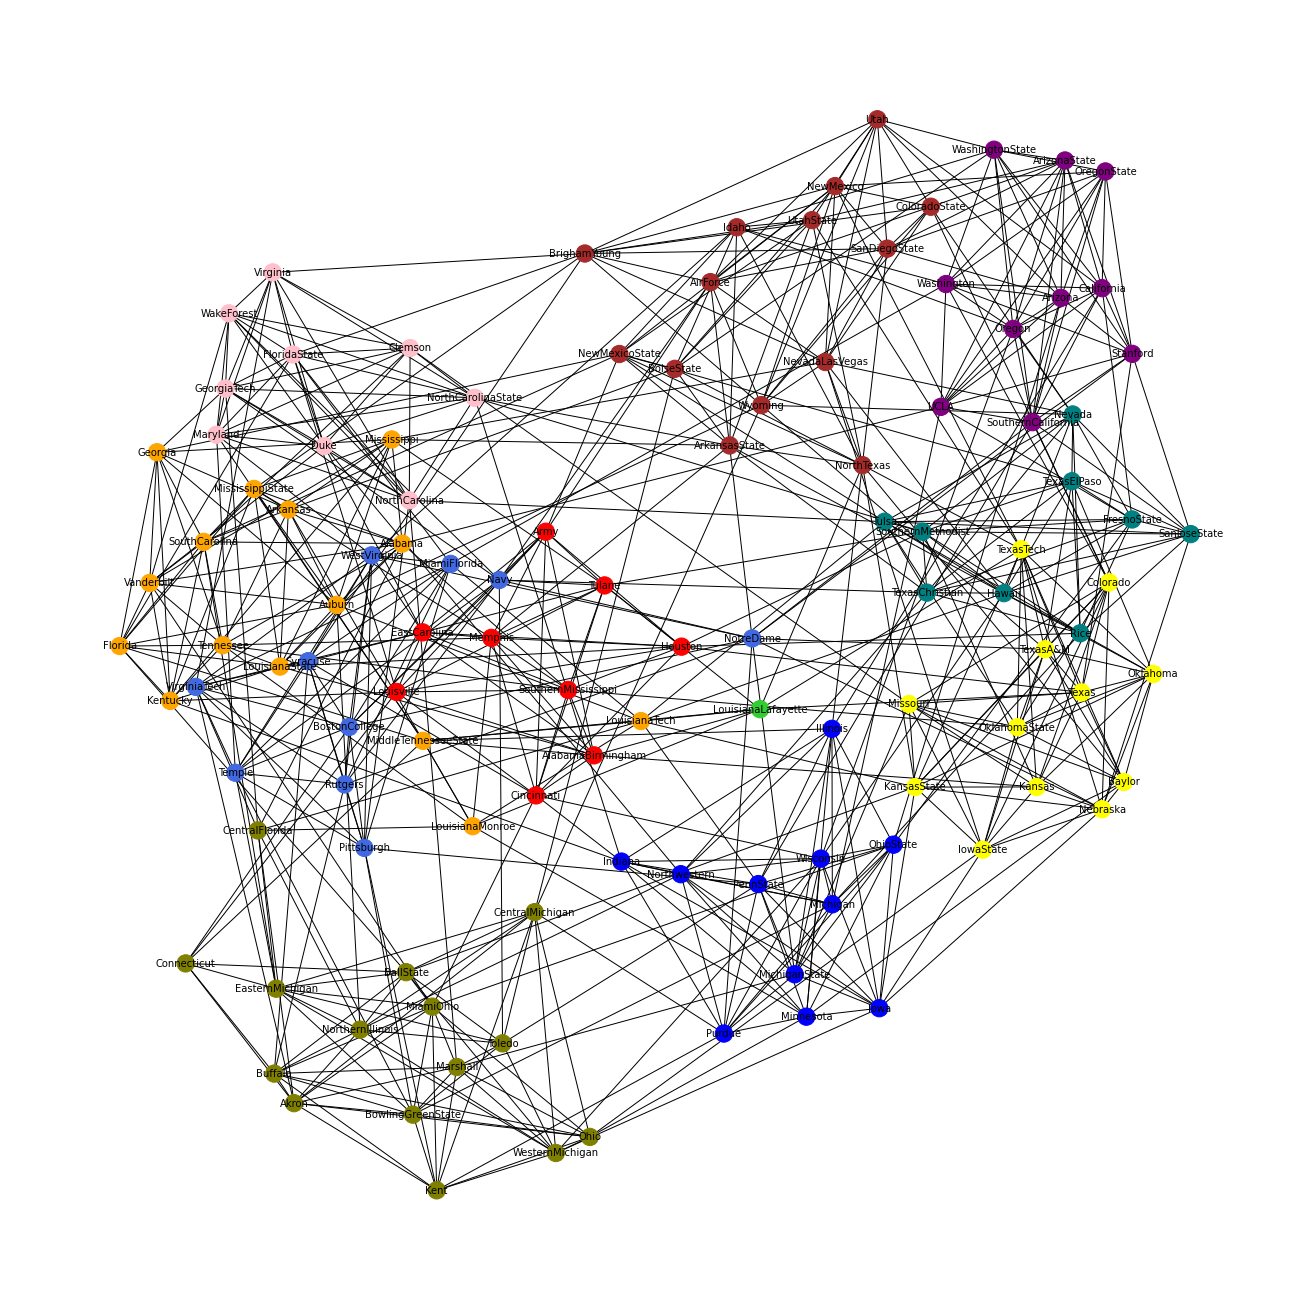

In [4]:
best_communities_names = relabel_nodes(best_communities, node_mapping)
H = nx.relabel_nodes(G, node_mapping)
color_map(best_communities_names, H)

While not a perfect representation of conferences (some pairs of conferences are paired together), our solution gives a higher modularity than the actual separation of conferences.

Actual Conferences:
Modularity of real conferences 0.5539733187144177


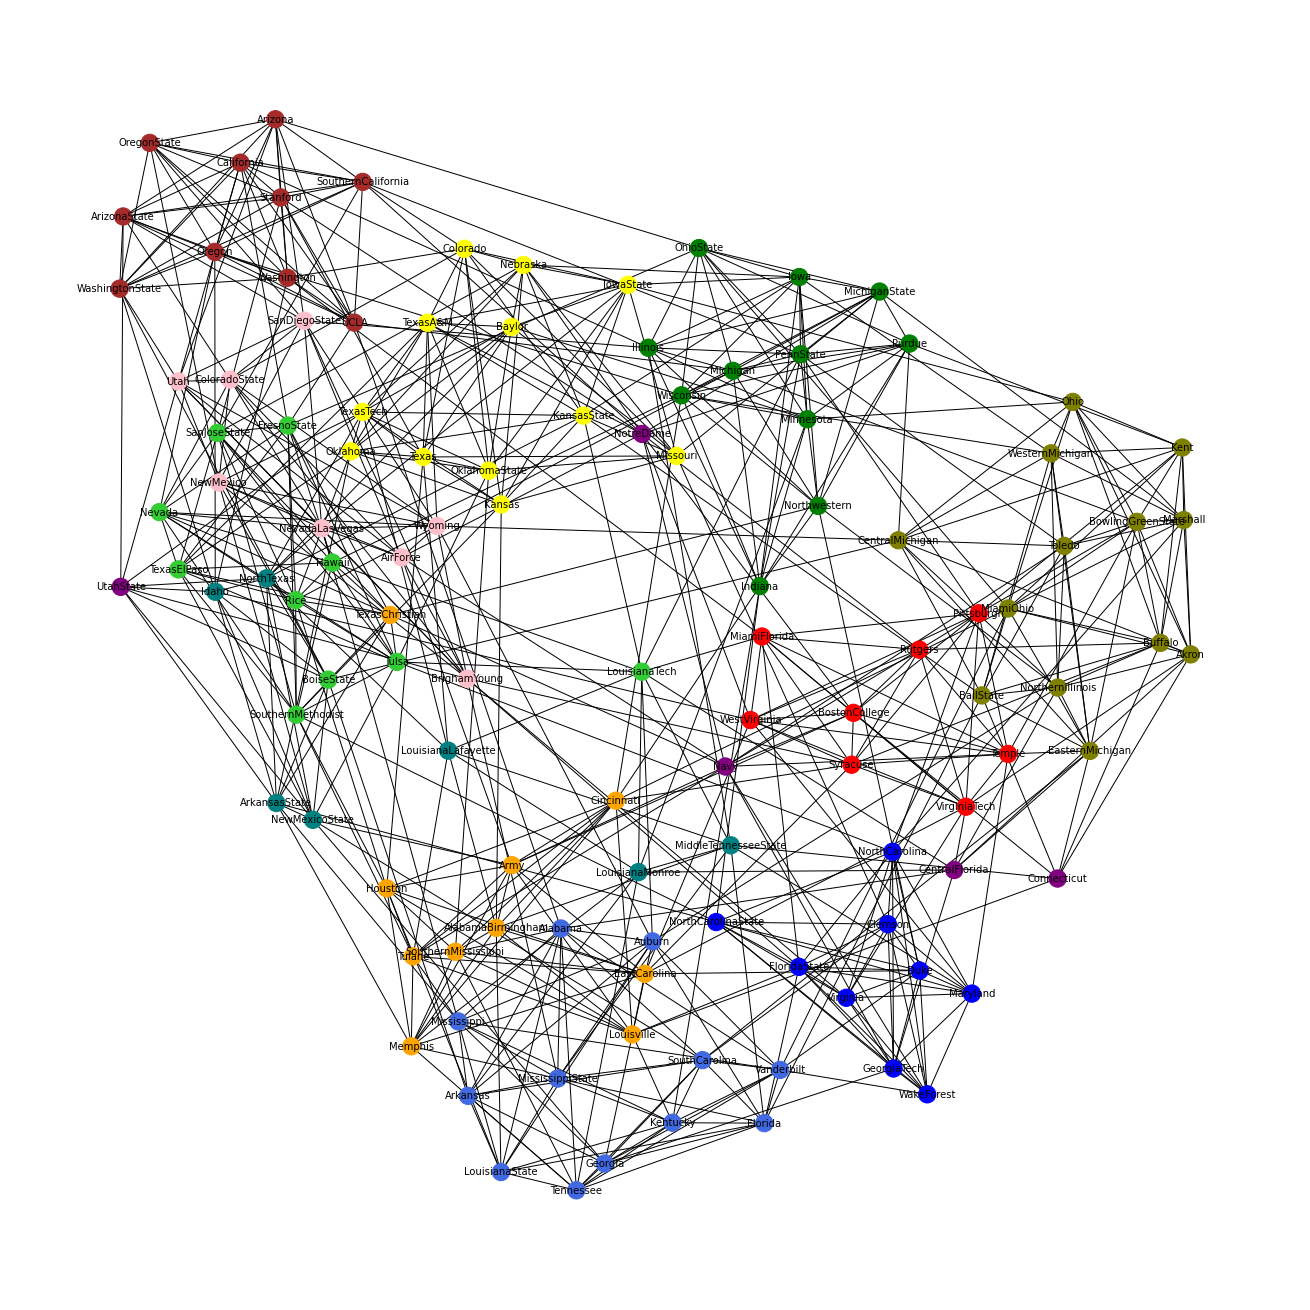

In [5]:
print("Actual Conferences:")
draw_real_football_conferences(G, node_mapping, best_communities_names)

Let's see how the quantum solution compares to classical algorithm solutions.

In [6]:
print("Girvan Modularity", calc_modularity(G, A, girvan(G), m))
print("Greedy Modularity", calc_modularity(G, A, greedy(G), m))
print("Louvain Modularity", calc_modularity(G, A, louvain(G), m))

Girvan Modularity 0.400356335940406
Greedy Modularity 0.5497406651426703
Louvain Modularity 0.6041836873185322


## The Quantum Edge

Solving this problem with a quantum computer could have advantages and insights over one of the heuristic algorithms. For one, we have seen better results on these smaller problems. While the classical heuristic algorithms are deterministic, we get multiple good results from a quantum solution that could be analyzed classically to find insights into the true nature of the communities and fraud rings. The Louvain algorithm [has also been known to fail in some cases](https://www.nature.com/articles/s41598-019-41695-z) . The Louvain algorithm also can [take too long for real transaction data](https://en.wikipedia.org/wiki/Louvain_method#Comparison_to_other_methods).

In the next couple of years when we have hundred of logical qubits, quantum computers will produce a richer result environment, faster and on larger datasets.